In [74]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import geopandas as gpd
import geoplot.crs as gcrs

# 1.0 Mostly experimentation about how to import dataframes and plot things

In [2]:
#Import a previously established df of Alameda census tracts

ALtracts = pd.read_csv('tracts_AL.csv')
ALtracts['Coordinates'] = ALtracts['geometry']
ALtracts.head(3)

,Unnamed: 0,level_0,index,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry,Tract Network,mean_street_length,percent_four_way,Coordinates
0,0,0,4891,6,1,437800,6001437800,4378.0,Census Tract 4378,G5020,S,1276296,0,37.643146,-122.068697,"POLYGON ((-122.074301 37.649843, -122.074275 3...",unnamed,104.68019512195124,3.1746031746031744,"POLYGON ((-122.074301 37.649843, -122.074275 3..."
1,1,1,4892,6,1,437400,6001437400,4374.0,Census Tract 4374,G5020,S,860214,0,37.642828,-122.087648,"POLYGON ((-122.087548 37.647594, -122.087425 3...",unnamed,130.39353146853145,28.571428571428573,"POLYGON ((-122.087548 37.647594, -122.087425 3..."
2,2,2,4893,6,1,405800,6001405800,4058.0,Census Tract 4058,G5020,S,519054,0,37.793945,-122.233099,"POLYGON ((-122.228418 37.791376, -122.228546 3...",unnamed,118.95545283018866,53.48837209302326,"POLYGON ((-122.228418 37.791376, -122.228546 3..."


In [3]:
%%capture
!pip install geoplot;

In [4]:
import geoplot

In [5]:
#Needed to convert to geodatabase apparently
from shapely.geometry import Point, LineString, Polygon

In [6]:
#Converting ALtracts to a geodatabase using the x y coordinates provided

ALtracts_geo = [Point(xy) for xy in zip(ALtracts.INTPTLON10, ALtracts.INTPTLAT10)]

ALtracts_geodatabase = gpd.GeoDataFrame(ALtracts, geometry=ALtracts_geo)

In [95]:
# Download a cartographic shapefile of the 50 states, which will include coastline

import requests
url = 'https://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_state_500k.zip'

with open('cb_2016_us_state_500k.zip', 'wb') as f:
    r = requests.get(url)
    f.write(r.content)

In [96]:
outlines = gpd.read_file('zip://cb_2016_us_state_500k.zip')

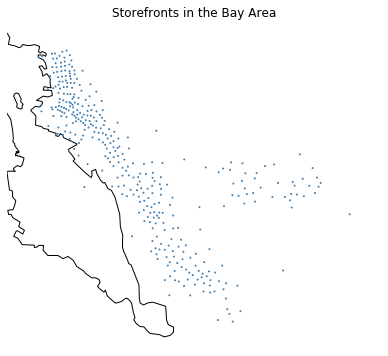

In [9]:
# Plot the coastline data we just loaded
ax = geoplot.polyplot(outlines, 
                      projection = geoplot.crs.AlbersEqualArea(),
                      extent = (-123, 36.9, -121.4, 38.7))  # lower left, upper right

# Overlay the alameda census tract points
geoplot.pointplot(ALtracts_geodatabase, 
                  projection = geoplot.crs.AlbersEqualArea(),
                  ax = ax,  # add it to the axes created above
                  s = 1)

ax.set_title("Storefronts in the Bay Area")

plt.show()

# 2.0 Bring in my Bay Area Shapefile

In [14]:
BayAreaTracts_shapefile = gpd.read_file("BayAreaTracts_shapefile.shp")
BayAreaTracts_shapefile.head(2)


,level_0,index,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,mean_stree,percent_fo,geometry
0,0,921,06,085,509201,06085509201,5092.01,Census Tract 5092.01,G5020,S,1579162,0,+37.4012062,-122.0743461,145.1941683168317,21.78217821782178,"POLYGON ((-122.06955 37.4084, -122.069507 37.4..."
1,1,922,06,085,510500,06085510500,5105,Census Tract 5105,G5020,S,2590775,0,+37.3927828,-122.1201120,108.7947087912088,15.78947368421053,"POLYGON ((-122.11405 37.38211, -122.114053 37...."


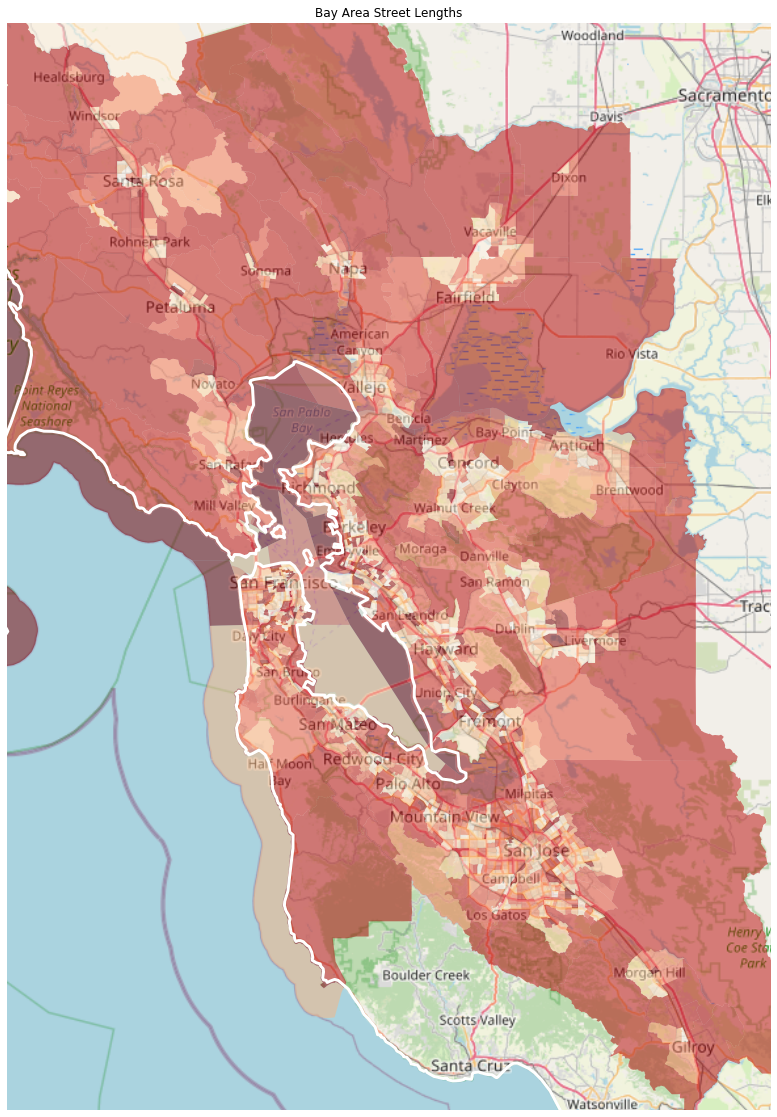

In [111]:
#Learning how to make plots!

#Bring in basemap. 
ax = geoplot.webmap(BayAreaTracts_shapefile, figsize=(20, 20), projection=gcrs.WebMercator(), zorder=0)

#Add choropleth, make orange and transparent
geoplot.choropleth(BayAreaTracts_shapefile, 
                  cmap='OrRd',
                   ax=ax, zorder=1,alpha=0.5,
                  hue='mean_stree')

#Add outline, make white and move to top
geoplot.polyplot(outlines, #figsize=(20, 20),
                edgecolor='white', facecolor='none', zorder=1, linewidth=3, ax=ax,
                extent = (-123, 36.9, -121.4, 38.7))  # lower left, upper right




ax.set_title("Bay Area Street Lengths")

plt.show()


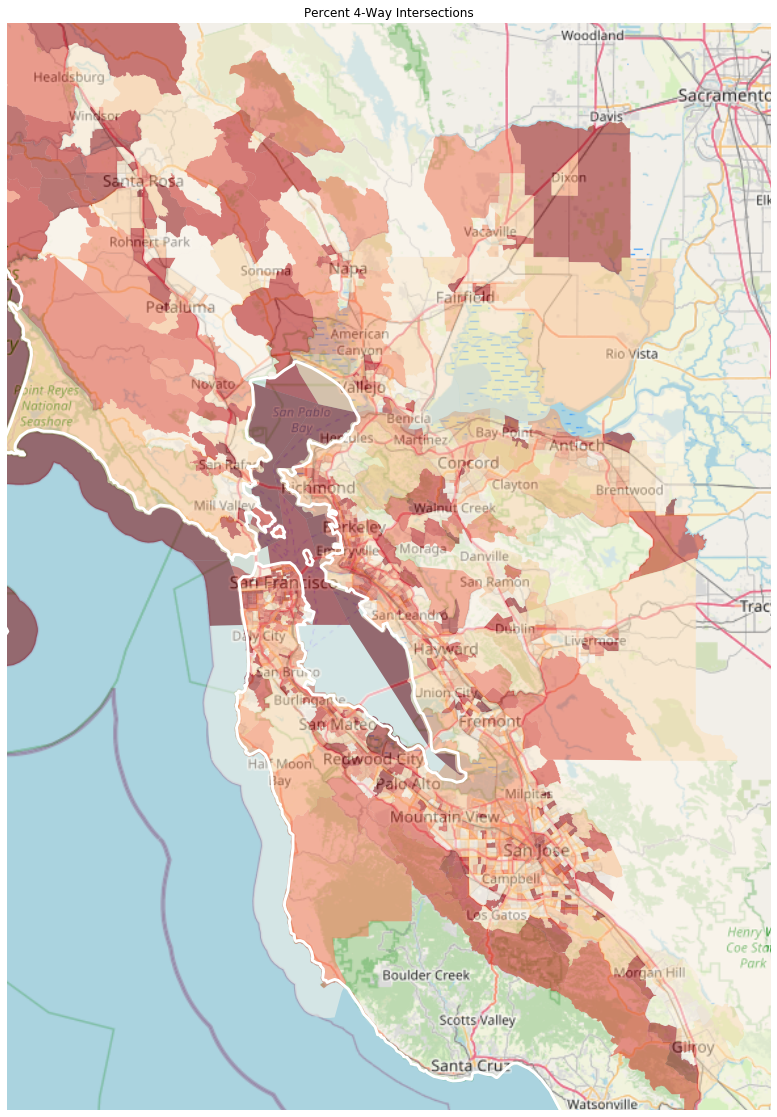

In [110]:
#Bring in basemap.
ax = geoplot.webmap(BayAreaTracts_shapefile, figsize=(20, 20), projection=gcrs.WebMercator(), zorder=0)

#Add choropleth, make orange and transparent
geoplot.choropleth(BayAreaTracts_shapefile, 
                  cmap='OrRd',
                   ax=ax, zorder=1,alpha=0.5,
                  hue='percent_fo')

#Add outline, make white and move to top
geoplot.polyplot(outlines, #figsize=(20, 20),
                projection = geoplot.crs.AlbersEqualArea(),
                edgecolor='white', facecolor='none', zorder=1, linewidth=3, ax=ax,
                extent = (-123, 36.9, -121.4, 38.7))  # lower left, upper right


ax.set_title("Percent 4-Way Intersections")

plt.show()
